# UNIVERSIDAD POLITECNICA SALESIANA

## Alumna: Narcisa Araujo


### Similitud de Coseno


In [4]:
from neo4j import GraphDatabase
username = ('neo4j')
password = ('egfa2209')
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=(username, password))
session2= driver.session()
cocina =session2.run("CREATE (french:Cuisine {name:'French'}), (italian:Cuisine {name:'Italian'}),  (indian:Cuisine {name:'Indian'}), (lebanese:Cuisine {name:'Lebanese'}), (portuguese:Cuisine {name:'Portuguese'}),(british:Cuisine {name:'British'}),  (mauritian:Cuisine {name:'Mauritian'})") 
persona = session2.run("CREATE (zhen:Person {name: 'Zhen'}), (praveena:Person {name: 'Praveena'}), (michael:Person {name:'Michael'}), (arya:Person {name: 'Arya'}), (karin:Person {name: 'Karin'})")
relacion = session2.run("CREATE (praveena)-[:LIKES {score: 9}]->(indian),  (praveena)-[:LIKES {score: 7}]->(portuguese), (praveena)-[:LIKES {score: 8}]->(british), (praveena)-[:LIKES {score: 1}]->(mauritian)")
relacion2= session2.run ("CREATE (zhen)-[:LIKES {score: 10}]->(french), (zhen)-[:LIKES {score: 6}]->(indian), (zhen)-[:LIKES {score: 2}]->(british)")
relacion3= session2.run (" CREATE (michael)-[:LIKES {score: 8}]->(french), (michael)-[:LIKES {score: 7}]->(italian), (michael)-[:LIKES {score: 9}]->(indian), (michael)-[:LIKES {score: 3}]->(portuguese)")
relacion4 = session2.run (" CREATE (arya)-[:LIKES {score: 10}]->(lebanese),  (arya)-[:LIKES {score: 10}]->(italian),  (arya)-[:LIKES {score: 7}]->(portuguese),  (arya)-[:LIKES {score: 9}]->(mauritian)")
relacion5 = session2.run (" CREATE (karin)-[:LIKES {score: 9}]->(lebanese), (karin)-[:LIKES {score: 7}]->(italian), (karin)-[:LIKES {score: 10}]->(portuguese)")
                    
session2.close()
driver.close()

In [5]:
#obtener similitud entre los gustos de la persona 
gustos = session2.run(" MATCH (p:Person), (c:Cuisine)OPTIONAL MATCH (p)-[likes:LIKES]->(c) WITH {item:id(p), weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData WITH collect(userData) AS data CALL gds.alpha.similarity.cosine.write({data: data,topK: 1, similarityCutoff: 0.1}) YIELD nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, stdDev, p25, p50, p75, p90, p95, p99, p999, p100 RETURN nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, p95")
print (gustos)
for c in gustos:
    print (c, 'ln')
print (' ')
print (' ')
print (' ')
similitudGustos = session2.run (" MATCH (p:Person), (c:Cuisine)  OPTIONAL MATCH (p)-[likes:LIKES]->(c) WITH {item:id(p), weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData  WITH collect(userData) AS data  CALL gds.alpha.similarity.cosine.stream({data: data})  YIELD item1, item2, count1, count2, similarity  RETURN gds.util.asNode(item1).name AS from, gds.util.asNode(item2).name AS to, similarity  ORDER BY similarity DESC ")
for c2 in similitudGustos:
    print (c2, "\n")


totalsimilitud= session2.run(" MATCH (p:Person), (c:Cuisine)  OPTIONAL MATCH (p)-[likes:LIKES]->(c)  WITH {item:id(p), weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData   WITH collect(userData) AS data  CALL gds.alpha.similarity.cosine.write({ data: data,topK: 1,similarityCutoff: 0.1})  YIELD nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, stdDev, p25, p50, p75, p90, p95, p99, p999, p100  RETURN nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, p95")
for re in   totalsimilitud:                      
    print (re, "\n")

<Record nodes=5 similarityPairs=5 writeRelationshipType='SIMILAR' writeProperty='score' min=0.9542236328125 max=1.0000038146972656 mean=0.9824020385742187 p95=1.0000038146972656> ln
 
 
 
<Record from='Praveena' to='Karin' similarity=1.0> 

<Record from='Karin' to='Praveena' similarity=1.0> 

<Record from='Michael' to='Arya' similarity=0.9788908326303921> 

<Record from='Arya' to='Michael' similarity=0.9788908326303921> 

<Record from='Arya' to='Karin' similarity=0.9610904115204073> 

<Record from='Karin' to='Arya' similarity=0.9610904115204073> 

<Record from='Zhen' to='Michael' similarity=0.9542262139256075> 

<Record from='Michael' to='Zhen' similarity=0.9542262139256075> 

<Record from='Praveena' to='Michael' similarity=0.9429903335828895> 

<Record from='Michael' to='Praveena' similarity=0.9429903335828895> 

<Record from='Zhen' to='Praveena' similarity=0.9191450300180579> 

<Record from='Praveena' to='Zhen' similarity=0.9191450300180579> 

<Record from='Karin' to='Michael' simila

### Arbol de nodos 

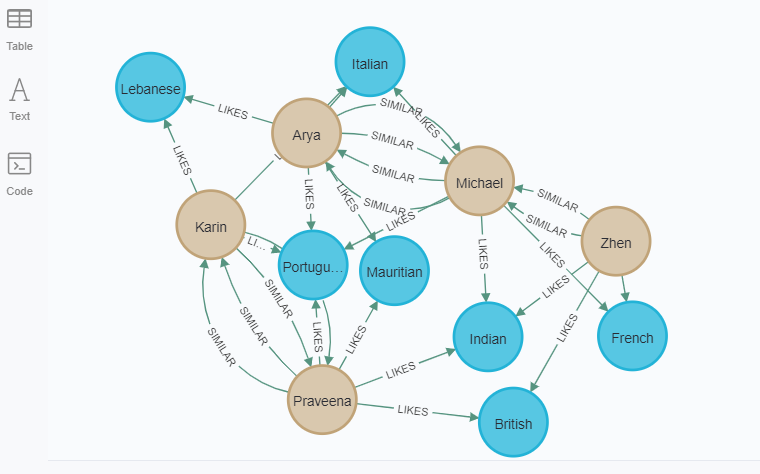

## Bibliografia

https://neo4j.com/docs/graph-algorithms/current/labs-algorithms/cosine/